# Info 523_Data Mining
## Week_5 Data Processing
### - *Author : Min Set Khant*
### - *Date : 25 September 2025*

In [1]:
# Call the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns


In [51]:
# import pandas as pd
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data',
                   header=None)

In [6]:
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']

data = data.drop(['Sample code'],axis=1)
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
data.head()

Number of instances = 699
Number of attributes = 10


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [8]:
data = data.replace('?',np.nan)

print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

Number of instances = 699
Number of attributes = 10
Number of missing values:
	Clump Thickness: 0
	Uniformity of Cell Size: 0
	Uniformity of Cell Shape: 0
	Marginal Adhesion: 0
	Single Epithelial Cell Size: 0
	Bare Nuclei: 16
	Bland Chromatin: 0
	Normal Nucleoli: 0
	Mitoses: 0
	Class: 0


In [10]:
# Extract the 'Bare Nuclei' column
data2 = data['Bare Nuclei']

print('Before replacing missing values:')
print(data2[20:25])

# Convert column to numeric (if there are non-numeric values like '?', they become NaN)
data2 = pd.to_numeric(data2, errors='coerce')

# Replace missing values (NaN) with the median
data2 = data2.fillna(data2.median())

print('\nAfter replacing missing values:')
print(data2[20:25])


Before replacing missing values:
20     10
21      7
22      1
23    NaN
24      1
Name: Bare Nuclei, dtype: object

After replacing missing values:
20    10.0
21     7.0
22     1.0
23     1.0
24     1.0
Name: Bare Nuclei, dtype: float64


In [11]:
# Print number of rows in the original dataset
print('Number of rows in original data = %d' % (data.shape[0]))

# Convert problematic columns to numeric so that missing values ('?', etc.) become NaN
data = data.apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
data2 = data.dropna()

# Print number of rows after dropping rows with missing values
print('Number of rows after discarding missing values = %d' % (data2.shape[0]))


Number of rows in original data = 699
Number of rows after discarding missing values = 683


<Axes: >

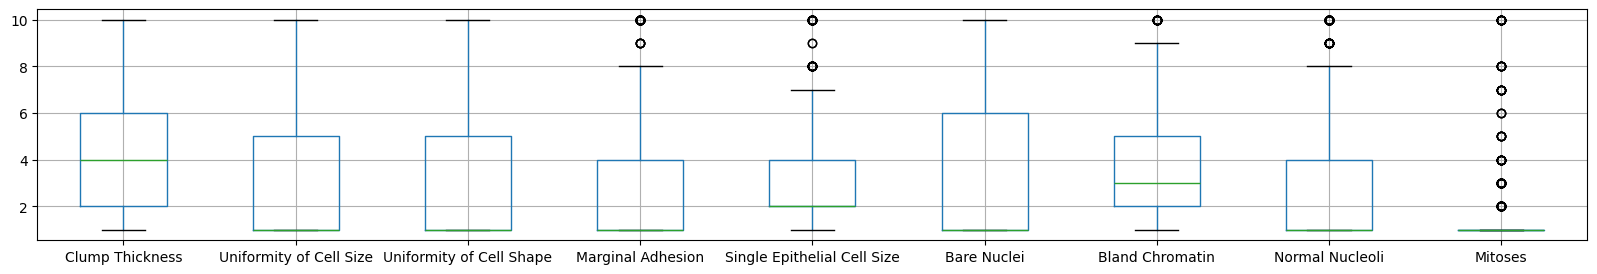

In [12]:
# Show plots inside Jupyter Notebook
%matplotlib inline

# Drop the 'Class' column
data2 = data.drop(['Class'], axis=1)

# Convert 'Bare Nuclei' to numeric; invalid values become NaN
data2['Bare Nuclei'] = pd.to_numeric(data2['Bare Nuclei'], errors='coerce')

# Create a boxplot for all numeric columns
data2.boxplot(figsize=(20, 3))


In [13]:
Z = (data2-data2.mean())/data2.std()
Z[20:25]


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
20,0.917080,-0.044070,-0.406284,2.519152,0.805662,1.771569,0.640688,0.371049,1.405526
21,1.982519,0.611354,0.603167,0.067638,1.257272,0.948266,1.460910,2.335921,-0.343666
22,-0.503505,-0.699494,-0.742767,-0.632794,-0.549168,-0.698341,-0.589645,-0.611387,-0.343666
23,1.272227,0.283642,0.603167,-0.632794,-0.549168,NaN,1.460910,0.043570,-0.343666
24,-1.213798,-0.699494,-0.742767,-0.632794,-0.549168,-0.698341,-0.179534,-0.611387,-0.343666


#Now is time to practicing with real data

In [14]:
# let create the fake traffic data for data Processing

np.random.seed(42)  # For reproducibility
data = pd.DataFrame({
    'Vehicle_Count': np.random.randint(100, 500, 20),
    'Average_Speed': np.random.randint(30, 80, 20),
    'Accidents': np.random.randint(0, 5, 20),
    'Road_Condition': np.random.choice(['Good', 'Moderate', 'Bad'], 20)
})

In [15]:
# View the our fake traffic data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Vehicle_Count   20 non-null     int64 
 1   Average_Speed   20 non-null     int64 
 2   Accidents       20 non-null     int64 
 3   Road_Condition  20 non-null     object
dtypes: int64(3), object(1)
memory usage: 772.0+ bytes


In [16]:
# Introduce some missing values
data.loc[[3, 7, 15], 'Vehicle_Count'] = np.nan
data.loc[[5, 10], 'Average_Speed'] = np.nan

In [17]:
print("Original Fake Traffic Data:")
print(data)


Original Fake Traffic Data:
    Vehicle_Count  Average_Speed  Accidents Road_Condition
0           202.0           53.0          4       Moderate
1           448.0           73.0          2           Good
2           370.0           59.0          4       Moderate
3             NaN           67.0          0       Moderate
4           171.0           31.0          1       Moderate
5           288.0            NaN          3       Moderate
6           120.0           62.0          0       Moderate
7             NaN           41.0          3       Moderate
8           221.0           51.0          1       Moderate
9           314.0           73.0          1           Good
10          430.0            NaN          0            Bad
11          187.0           78.0          1       Moderate
12          472.0           56.0          4       Moderate
13          199.0           71.0          1       Moderate
14          459.0           57.0          3       Moderate
15            NaN           

In [18]:
#Check the missing values in the traffic dataset
print ("View the missing values count")
print(data.isnull().sum())

View the missing values count
Vehicle_Count     3
Average_Speed     2
Accidents         0
Road_Condition    0
dtype: int64


In [19]:
# 3. Fill missing values with median for numeric columns
data_filled = data.copy()
data_filled['Vehicle_Count'] = data_filled['Vehicle_Count'].fillna(data_filled['Vehicle_Count'].median())
data_filled['Average_Speed'] = data_filled['Average_Speed'].fillna(data_filled['Average_Speed'].median())

print("\nData after filling missing values:")
print(data_filled)


Data after filling missing values:
    Vehicle_Count  Average_Speed  Accidents Road_Condition
0           202.0           53.0          4       Moderate
1           448.0           73.0          2           Good
2           370.0           59.0          4       Moderate
3           288.0           67.0          0       Moderate
4           171.0           31.0          1       Moderate
5           288.0           58.0          3       Moderate
6           120.0           62.0          0       Moderate
7           288.0           41.0          3       Moderate
8           221.0           51.0          1       Moderate
9           314.0           73.0          1           Good
10          430.0           58.0          0            Bad
11          187.0           78.0          1       Moderate
12          472.0           56.0          4       Moderate
13          199.0           71.0          1       Moderate
14          459.0           57.0          3       Moderate
15          288.0   

In [20]:
# 4. Drop rows with any missing values (just to show)
data_dropped = data.dropna()
print("\nData after dropping rows with missing values:")
print(data_dropped)


Data after dropping rows with missing values:
    Vehicle_Count  Average_Speed  Accidents Road_Condition
0           202.0           53.0          4       Moderate
1           448.0           73.0          2           Good
2           370.0           59.0          4       Moderate
4           171.0           31.0          1       Moderate
6           120.0           62.0          0       Moderate
8           221.0           51.0          1       Moderate
9           314.0           73.0          1           Good
11          187.0           78.0          1       Moderate
12          472.0           56.0          4       Moderate
13          199.0           71.0          1       Moderate
14          459.0           57.0          3       Moderate
16          230.0           44.0          3       Moderate
17          249.0           76.0          3            Bad
18          408.0           73.0          4            Bad
19          357.0           32.0          2       Moderate


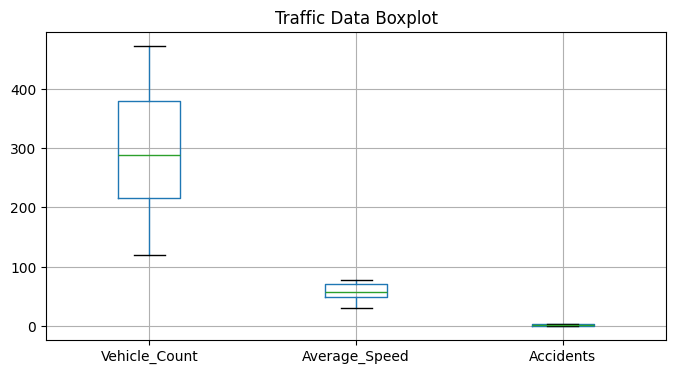

In [22]:
# 5. Boxplot for numeric columns
import matplotlib.pyplot as plt

numeric_data = data_filled[['Vehicle_Count', 'Average_Speed', 'Accidents']]
numeric_data.boxplot(figsize=(8, 4))
plt.title("Traffic Data Boxplot")
plt.show()

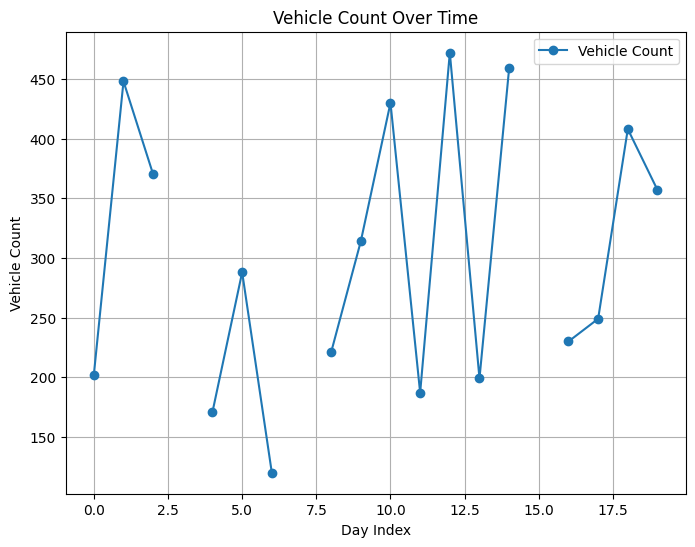

In [26]:
# 6. Create the some funcy plot with our traffic data
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(data.index, data['Vehicle_Count'], marker='o', linestyle='-', label='Vehicle Count')
plt.title('Vehicle Count Over Time')
plt.xlabel('Day Index')
plt.ylabel('Vehicle Count')
plt.legend()
plt.grid(True)
plt.show()


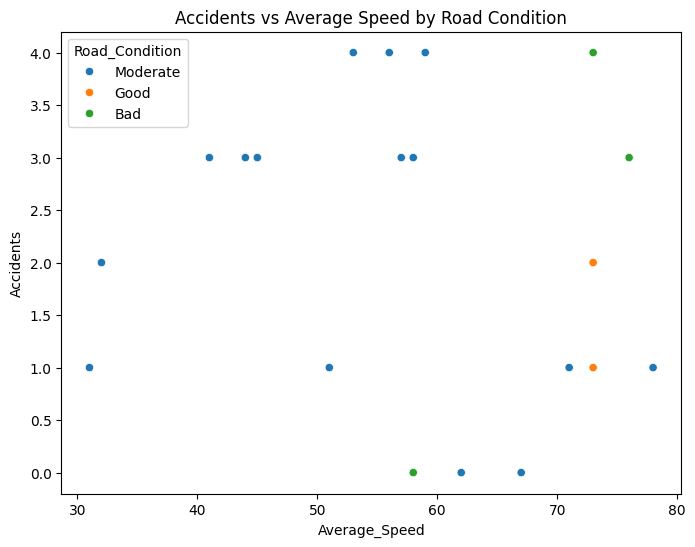

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with hue using Seaborn
plt.figure(figsize=(8,6))
sns.scatterplot(data=data_filled, x="Average_Speed", y="Accidents", hue="Road_Condition")
plt.title("Accidents vs Average Speed by Road Condition")
plt.show()


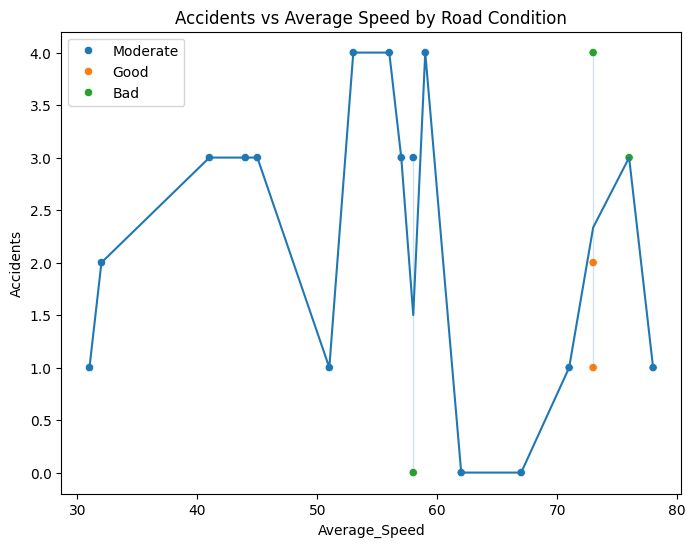

In [36]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data_filled, x="Average_Speed", y="Accidents", hue="Road_Condition")
sns.lineplot(data=data_filled, x="Average_Speed", y="Accidents")
plt.title("Accidents vs Average Speed by Road Condition")
plt.show()


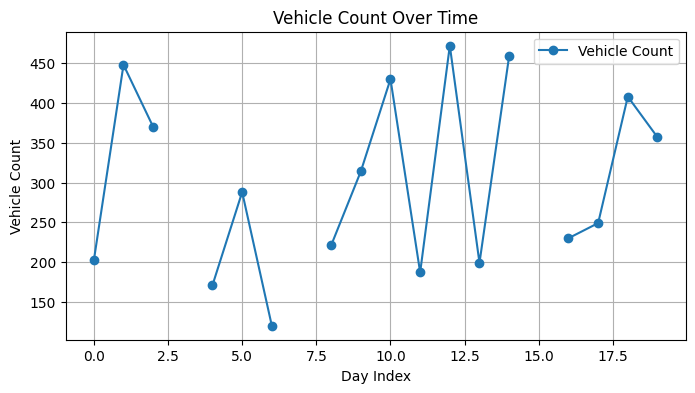

In [37]:
# 2. Plot 1: Line Plot - Vehicle Count Over Time
plt.figure(figsize=(8, 4))
plt.plot(data.index, data['Vehicle_Count'], marker='o', linestyle='-', label='Vehicle Count')
plt.title('Vehicle Count Over Time')
plt.xlabel('Day Index')
plt.ylabel('Vehicle Count')
plt.legend()
plt.grid(True)
plt.show()

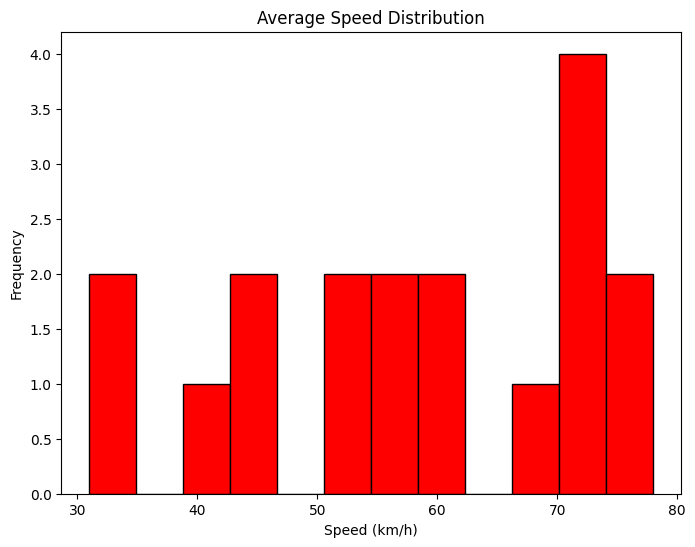

In [43]:
# Plot 2: Histogram - Average Speed Distribution
plt.figure(figsize=(8, 6))
plt.hist(data['Average_Speed'], bins=12, edgecolor='black', color ="red")
plt.title('Average Speed Distribution')
plt.xlabel('Speed (km/h)')
plt.ylabel('Frequency')
plt.show()

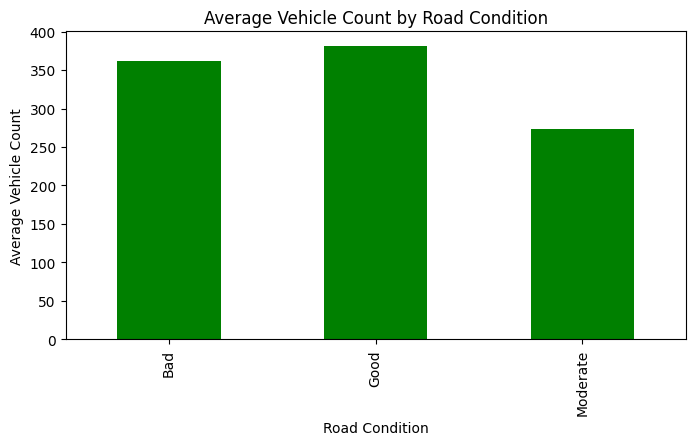

In [50]:
#  Bar Chart - Average Vehicle Count by Road Condition
avg_count_by_road = data.groupby('Road_Condition')['Vehicle_Count'].mean()
plt.figure(figsize=(8, 4))
avg_count_by_road.plot(kind='bar', color='green')
plt.title('Average Vehicle Count by Road Condition')
plt.xlabel('Road Condition')
plt.ylabel('Average Vehicle Count')
plt.show()

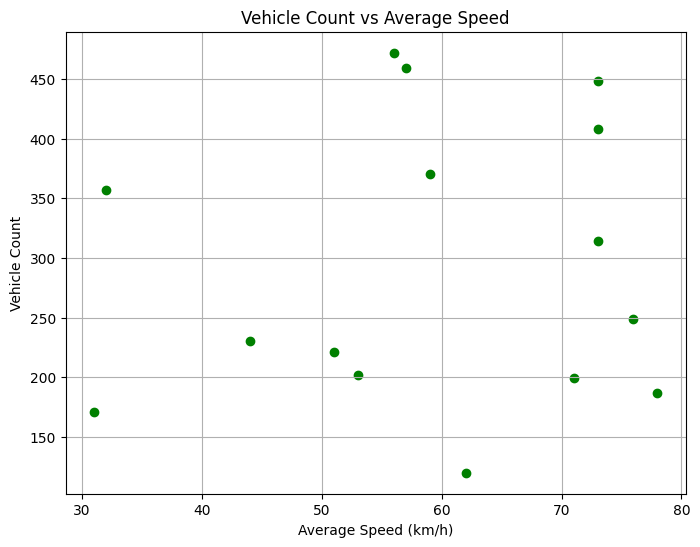

In [47]:
# Plot 4: Scatter Plot - Speed vs Vehicle Count
plt.figure(figsize=(8, 6))
plt.scatter(data['Average_Speed'], data['Vehicle_Count'], color='green')
plt.title('Vehicle Count vs Average Speed')
plt.xlabel('Average Speed (km/h)')
plt.ylabel('Vehicle Count')
plt.grid(True)
plt.show()

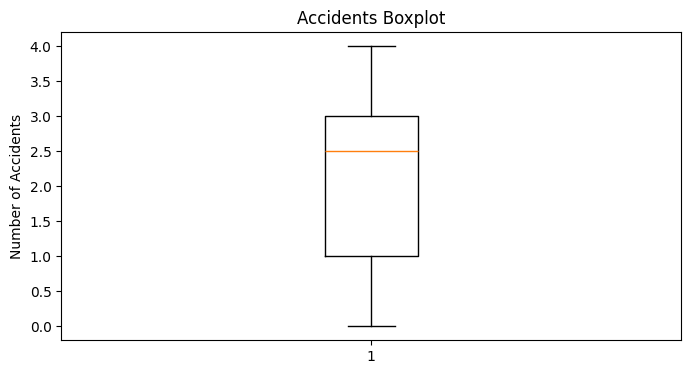

In [49]:
# Plot 5: Boxplot - Accidents
plt.figure(figsize=(8, 4))
plt.boxplot(data['Accidents'])
plt.title('Accidents Boxplot')
plt.ylabel('Number of Accidents')
plt.show()


# Plots included:

Line Plot – Shows traffic count over time (day index).

Histogram – Distribution of average speed.

Bar Chart – Average vehicle count per road condition.

Scatter Plot – Relationship between speed and vehicle count.

Boxplot – Accident data visualization.